In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
import imutils
import argparse
import os
import math


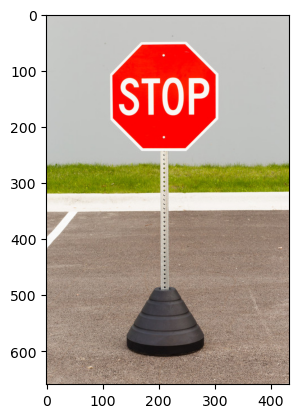

In [3]:
test_im = cv2.imread('/Users/macbook/Downloads/7448-0__03292.jpg')
test_im = cv2.cvtColor(test_im, cv2.COLOR_BGR2RGB)
plt.imshow(test_im)

In [4]:
def constrastLimit(image):
    img_hist_equalized = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    channels = list(cv2.split(img_hist_equalized))
    channels[0] = cv2.equalizeHist(channels[0])
    img_hist_equalized = cv2.merge(channels)
    img_hist_equalized = cv2.cvtColor(img_hist_equalized, cv2.COLOR_YCrCb2BGR)
    return img_hist_equalized


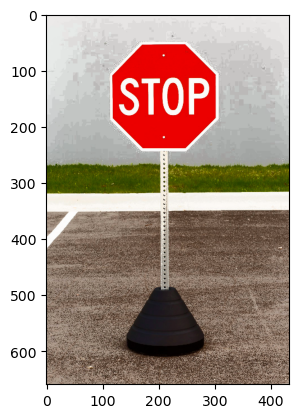

In [5]:
ctr_im = constrastLimit(test_im)
plt.imshow(ctr_im)

In [6]:
def LaplacianOfGaussian(image):
    LoG_image = cv2.GaussianBlur(image, (3,3), 0)           # paramter 
    gray = cv2.cvtColor( LoG_image, cv2.COLOR_BGR2GRAY)
    LoG_image = cv2.Laplacian( gray, cv2.CV_8U,3,3,2)       # parameter
    LoG_image = cv2.convertScaleAbs(LoG_image)
    return LoG_image
    

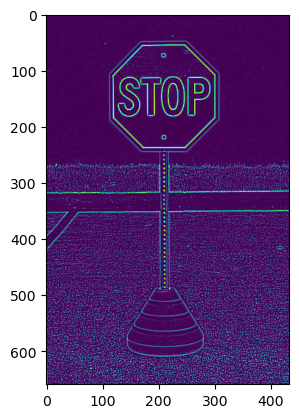

In [7]:
lap_im = LaplacianOfGaussian(test_im)
plt.imshow(lap_im)

In [8]:
def binarization(image):
    thresh = cv2.threshold(image,32,255,cv2.THRESH_BINARY)[1]
    #thresh = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    return thresh

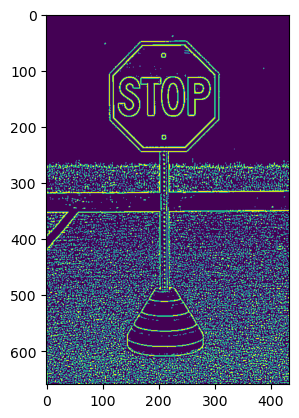

In [9]:
bin_im = binarization(lap_im)
plt.imshow(bin_im)

In [10]:
def preprocess_image(image):
    image = constrastLimit(image)
    image = LaplacianOfGaussian(image)
    image = binarization(image)
    return image
pre_im = preprocess_image(test_im)

In [11]:
def removeSmallComponents(image, threshold):
    #find all your connected components (white blobs in your image)
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)
    sizes = stats[1:, -1]; nb_components = nb_components - 1

    img2 = np.zeros((output.shape),dtype = np.uint8)
    #for every component in the image, you keep it only if it's above threshold
    for i in range(0, nb_components):
        if sizes[i] >= threshold:
            img2[output == i + 1] = 255
    return img2


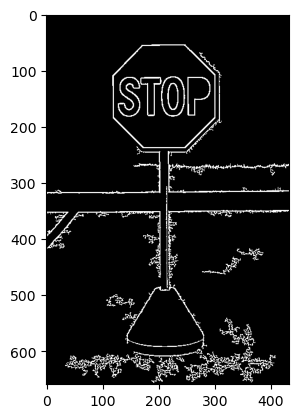

In [12]:
pre_im = removeSmallComponents(pre_im,200)
plt.imshow(pre_im,cmap='gray')

In [13]:
gray = pre_im.copy()
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)
image = test_im.copy()

In [14]:
def largest_cont(edg):
    cnts, hierarchy  = cv2.findContours(edg.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    #select contour with the biggest area
    cnt = max(cnts , key = cv2.contourArea)
    #perimeter approximation (True --> closed contour)
    return cnt

In [15]:
def draw_cont(img,edg):
    #draw contours
    cnts, hierarchy  = cv2.findContours(edg.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(cnts , key = cv2.contourArea)
    return cv2.drawContours(img.copy(), [cnt], -1, (0,255,0), 3)

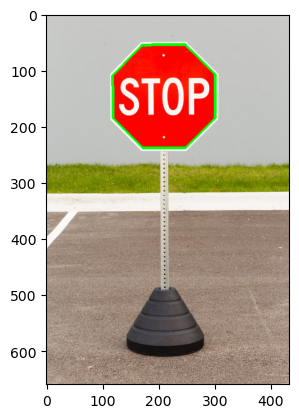

In [16]:
plt.imshow(draw_cont(test_im,pre_im))